In [141]:
# import thu vien 
import pandas as pd

In [142]:
colunas = ['Id', 'Name', 'Age', 'Weight','m0006', 'm0612', 'm1218', 'f0006', 'f0612', 'f1218']    

In [143]:
df= pd.read_csv('./patient_heart_rate.csv', names=colunas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
Id        16 non-null object
Name      15 non-null object
Age       12 non-null object
Weight    12 non-null object
m0006     15 non-null object
m0612     15 non-null object
m1218     15 non-null object
f0006     15 non-null object
f0612     14 non-null object
f1218     15 non-null object
dtypes: object(10)
memory usage: 1.5+ KB


In [144]:
df

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
1,1,Mickéy Mousé,56,70kgs,72,69,71,-,-,-
2,2,Donald Duck,34,154.89lbs,-,-,-,85,84,76
3,3,Mini Mouse,16,NaN,-,-,-,65,69,72
4,4,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
5,5,Pink Panther,54,198.658lbs,-,-,-,69,NaN,75
6,6,Huey McDuck,52,189lbs,-,-,-,68,75,72
7,7,Dewey McDuck,19,56kgs,-,-,-,71,78,75
8,8,Scööpy Doo,32,78kgs,78,76,75,-,-,-
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df[['Firstname', 'Lastname']] = df['Name'].str.split(expand=True) 
df=df.drop('Name', axis=1)

In [146]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70kgs,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,154.89lbs,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck


5. Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu.  
    -Ta sẽ chuyển các đơn vị về thành đơn vị chuẩn “kg” 

In [147]:
weigth = df['Weight']
for i in range(0,len(weigth)):
    x = str(weigth[i])  
    if 'lbs' in x[-3]:
        x = x[:-3]
        float_x = float(x)
        y = int(float_x/2.2) 
        weigth[i] = y
    if 'kgs' in x[-3]:
        x = x[:-3]
        float_x = float(x)
        weigth[i] = x

In [148]:
df.rename(columns={'Weight':'Weight_kgs'}, inplace=True)  

In [149]:
df.head(5)


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70kgs,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,154.89lbs,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck


6. Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là xóa bỏ 

In [150]:
df.dropna(how = 'all', inplace = True)  

7. Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, weight_kgs,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý. 

In [151]:
df = df.drop_duplicates(subset= ['Firstname','Lastname','Age','Weight_kgs'])

8. Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: 
Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay 
bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’)

In [152]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True) 
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)  
print(df)

    Id  Age  Weight_kgs  m0006  m0612  m1218  f0006  f0612  f1218 Firstname  \
0   Id  Age      Weight  m0006  m0612  m1218  f0006  f0612  f1218      Name   
1    1   56       70kgs     72     69     71      -      -      -     Micky   
2    2   34   154.89lbs      -      -      -     85     84     76    Donald   
3    3   16         NaN      -      -      -     65     69     72      Mini   
4    4  NaN       78kgs     78     79     72      -      -      -   Scrooge   
5    5   54  198.658lbs      -      -      -     69    NaN     75      Pink   
6    6   52      189lbs      -      -      -     68     75     72      Huey   
7    7   19       56kgs      -      -      -     71     78     75     Dewey   
8    8   32       78kgs     78     76     75      -      -      -      Scpy   
12  10   12       45kgs      -      -      -     92     95     87     Louie   
13  11  NaN       60kgs     78     75     72      -      -      -     Henry   
14  12   34         NaN     65     67     55      - 

9. “Missing values”, vấn đề này xảy ra tại các cột “Age”, “Weight” và “Heart Rate”. Thiếu 
dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều 
nguyên nhân chủ quan lẫn khách quan. Có một vài giải pháp để xử lý vấn đề này, chủ yếu 
dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ 
chuyên gia như sau: 
a. Deletion: Remove records with missing values 
b. Dummy substitution: Replace missing values with a dummy but valid 
value: e.g.: 0 for numerical values. 
c. Mean substitution: Replace the missing values with the mean. 
d. Frequent substitution: Replace the missing values with the most 
frequent item. 
e. Improve the data collector: Your business folk will talk to the clients 
and inform them about why it is worth fixing the problem with the data 
collector.

In [153]:
# Thay thế bằng giá trị yếu vị
df['Age'].fillna(df['Age'].mode()[0], inplace=True) 
df['Weight_kgs'].fillna(df['Weight_kgs'].mode()[0], inplace=True)

10. Thay thế giá trị thiếu của cân nặng bằng giá trị trung vị

In [154]:
# df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)
df.head(5)  


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70kgs,72,69,71,-,-,-,Micky,Mous
2,2,34,154.89lbs,-,-,-,85,84,76,Donald,Duck
3,3,16,78kgs,-,-,-,65,69,72,Mini,Mouse
4,4,34,78kgs,78,79,72,-,-,-,Scrooge,McDuck


11. “Một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta thấy 
header “m0006” chứa các nội dung bao gồm: m → male, 0006 ~ 00-06 (lần đo chỉ số 
nhịp tim từ 00h- đến 06h). Còn giá trị thì là kết quả đo nhịp tim. 

In [155]:
# Bước 1: Tạo melt dữ liệu để có cột gender_time 
df  = pd.melt(df, id_vars=['Id', 'Age', 'Weight_kgs','Firstname', 'Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs','Firstname', 'Lastname' ])
df.head(5) 


,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
1,1,56,70kgs,Micky,Mous,m0006,72
16,1,56,70kgs,Micky,Mous,m0612,69
31,1,56,70kgs,Micky,Mous,m1218,71
46,1,56,70kgs,Micky,Mous,f0006,-
61,1,56,70kgs,Micky,Mous,f0612,-


In [156]:
# Bước 2: Tạo data frame tạm là kết quả của việc tách cột gender_time
df_temp= df['gender_time'].str.extract('(\D)(\d+)(\d{2})', expand=True)
df_temp.head(5)  

,0,1,2
1,m,00,06
16,m,06,12
31,m,12,18
46,f,00,06
61,f,06,12


In [157]:
# Bước 3: Đặt tên cột cho data frame tạm
df_temp.columns = ['Gender','Lower_hour','Upper_hour']
df_temp.head(5)

,Gender,Lower_hour,Upper_hour
1,m,00,06
16,m,06,12
31,m,12,18
46,f,00,06
61,f,06,12


In [158]:
# Bước 4: Gộp data frame tạm vào data frame gốc
df = pd.concat([df, df_temp], axis=1)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70kgs,Micky,Mous,m0006,72,m,00,06
16,1,56,70kgs,Micky,Mous,m0612,69,m,06,12
31,1,56,70kgs,Micky,Mous,m1218,71,m,12,18
46,1,56,70kgs,Micky,Mous,f0006,-,f,00,06
61,1,56,70kgs,Micky,Mous,f0612,-,f,06,12


In [159]:
# Buooc 5: Xóa cột gender_time
df = df.drop(['gender_time'], axis=1)   
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70kgs,Micky,Mous,72,m,00,06
16,1,56,70kgs,Micky,Mous,69,m,06,12
31,1,56,70kgs,Micky,Mous,71,m,12,18
46,1,56,70kgs,Micky,Mous,-,f,00,06
61,1,56,70kgs,Micky,Mous,-,f,06,12


12. Loại bỏ hết các dòng dữ liệu thừa là những dòng có phần PulseRate có dấu -

In [160]:
import numpy as np

In [161]:
df =df.replace('-',np.nan).dropna(subset=['PulseRate'])
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70kgs,Micky,Mous,72,m,00,06
16,1,56,70kgs,Micky,Mous,69,m,06,12
31,1,56,70kgs,Micky,Mous,71,m,12,18
54,10,12,45kgs,Louie,McDuck,92,f,00,06
69,10,12,45kgs,Louie,McDuck,95,f,06,12


13. Nhận thấy có những bệnh nhân chưa ghi nhận họ tên (ví lý do nào đó) 

In [162]:
df['Firstname'].isnull().sum()  
df['Lastname'].isnull().sum()
# Nhưng giá trị nhịp tim và thời gian đo nhịp tim thì đầy đủ nên dữ liệu quan tâm là trị số 
# nhịp tim vẫn dùng được, nên ta thay họ, tên bị thiếu thành Unknown
df['Firstname'].fillna('Unknown', inplace=True)
df['Lastname'].fillna('Unknown', inplace=True)
df.head(5)  

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70kgs,Micky,Mous,72,m,00,06
16,1,56,70kgs,Micky,Mous,69,m,06,12
31,1,56,70kgs,Micky,Mous,71,m,12,18
54,10,12,45kgs,Louie,McDuck,92,f,00,06
69,10,12,45kgs,Louie,McDuck,95,f,06,12


14. Sau khi xử lý thì index của dòng dữ liệu đã thay đổi lung tung, ta cần reset index lại cho 
theo khuôn mẫu

In [163]:
# df = df.reset_index 
# #

In [164]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70kgs,Micky,Mous,72,m,00,06
16,1,56,70kgs,Micky,Mous,69,m,06,12
31,1,56,70kgs,Micky,Mous,71,m,12,18
54,10,12,45kgs,Louie,McDuck,92,f,00,06
69,10,12,45kgs,Louie,McDuck,95,f,06,12
84,10,12,45kgs,Louie,McDuck,87,f,12,18
10,11,34,60kgs,Henry,Nam,78,m,00,06
25,11,34,60kgs,Henry,Nam,75,m,06,12
40,11,34,60kgs,Henry,Nam,72,m,12,18
11,12,34,78kgs,Michel,Long,65,m,00,06


15. Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file patient_heart_rate_clean.csv

In [165]:
# df.to_csv('patient_heart_rate_cleaned.csv', index=False)    

In [166]:

import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x614d320>,
 [Text(-0.30990572269135597, 1.055442297353649, 'F'),
  Text(0.3099056238737145, -1.0554423263691124, 'M')],
 [Text(-0.16903948510437597, 0.5756957985565357, '59.1%'),
  Text(0.16903943120384426, -0.5756958143831521, '40.9%')])

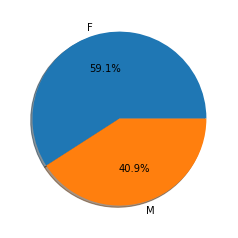

In [167]:
# Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ
y = df['Gender'].value_counts()
mylabels = ['F','M']
plt.pie(y, labels = mylabels, autopct='%.1f%%' , shadow=True)  

In [168]:
# 2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname 
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
1,1,56,70kgs,Micky,Mous,72,m,00,06,Micky Mous
16,1,56,70kgs,Micky,Mous,69,m,06,12,Micky Mous
31,1,56,70kgs,Micky,Mous,71,m,12,18,Micky Mous
54,10,12,45kgs,Louie,McDuck,92,f,00,06,Louie McDuck
69,10,12,45kgs,Louie,McDuck,95,f,06,12,Louie McDuck


In [169]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
1,1,56,70kgs,Micky,Mous,72,m,00,06,Micky Mous
16,1,56,70kgs,Micky,Mous,69,m,06,12,Micky Mous
31,1,56,70kgs,Micky,Mous,71,m,12,18,Micky Mous
54,10,12,45kgs,Louie,McDuck,92,f,00,06,Louie McDuck
69,10,12,45kgs,Louie,McDuck,95,f,06,12,Louie McDuck
84,10,12,45kgs,Louie,McDuck,87,f,12,18,Louie McDuck
10,11,34,60kgs,Henry,Nam,78,m,00,06,Henry Nam
25,11,34,60kgs,Henry,Nam,75,m,06,12,Henry Nam
40,11,34,60kgs,Henry,Nam,72,m,12,18,Henry Nam
11,12,34,78kgs,Michel,Long,65,m,00,06,Michel Long


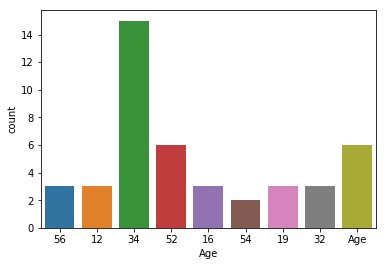

In [170]:
# 3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân 
sns.countplot(x='Age', data=df)
plt.show()


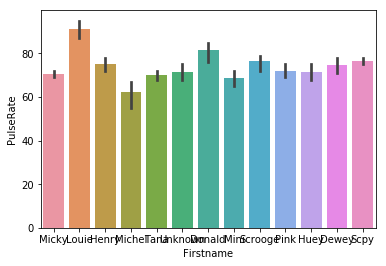

In [178]:
# 4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân 
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

df.dropna(subset=['PulseRate'], inplace=True) 
sns.barplot(x= 'Firstname',y='PulseRate', data=df)
plt.show()

d:\USERS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


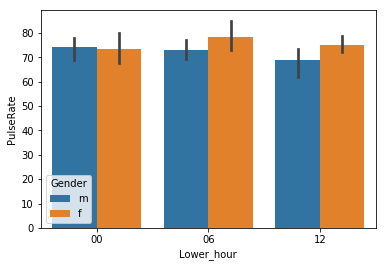

In [179]:
# 5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính 
sns.barplot(x= 'Lower_hour',y='PulseRate', data=df, hue='Gender')   
plt.show()

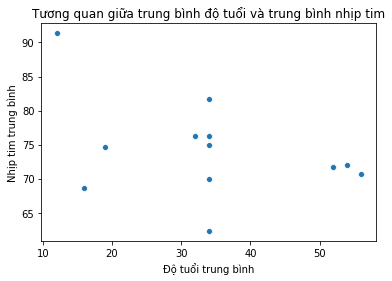

In [184]:
# 6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')
df.dropna(subset=['Age', 'PulseRate'], inplace=True)

grouped_df = df.groupby('Firstname').agg({'Age': 'mean', 'PulseRate': 'mean'}).reset_index()


sns.scatterplot(x='Age', y='PulseRate', data=grouped_df)

plt.xlabel("Độ tuổi trung bình")
plt.ylabel("Nhịp tim trung bình")
plt.title("Tương quan giữa trung bình độ tuổi và trung bình nhịp tim")
plt.show()


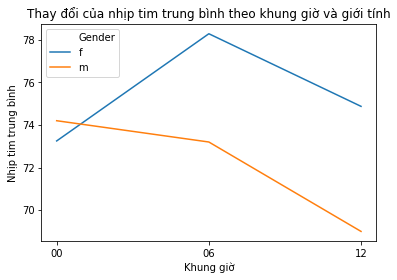

In [196]:
# 7. Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính. 


grouped_df = df.groupby(['Lower_hour', 'Gender']).agg({'PulseRate': 'mean'}).reset_index()

sns.lineplot(x='Lower_hour', y='PulseRate', data=grouped_df, hue='Gender')
plt.xlabel("Khung giờ")
plt.ylabel("Nhịp tim trung bình")
plt.title("Thay đổi của nhịp tim trung bình theo khung giờ và giới tính")
plt.show()    